C:\temp\ipykernel_27988\3862287926.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Difficulty', data=data, palette='viridis')


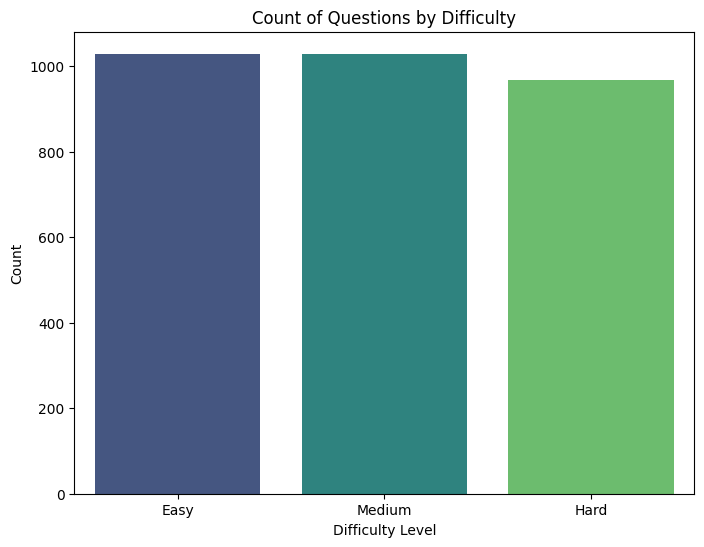

C:\temp\ipykernel_27988\3862287926.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Difficulty', y='TextLength', data=data, palette='coolwarm')


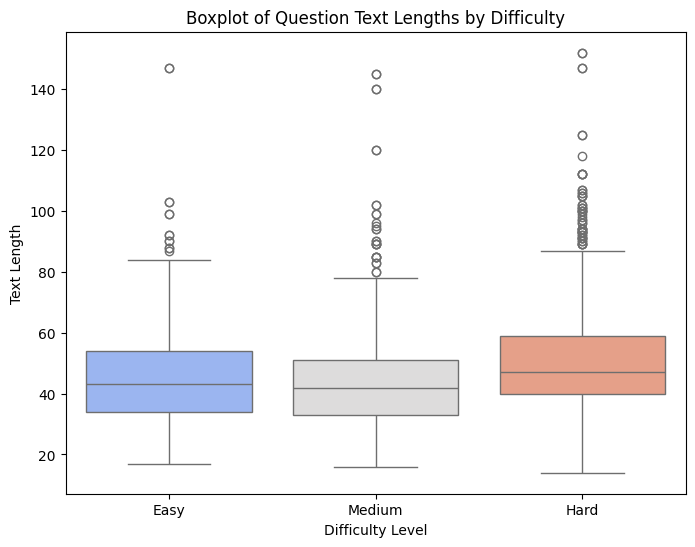

c:\Users\Electronica Care\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Electronica Care\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Model Accuracy: 90.25%


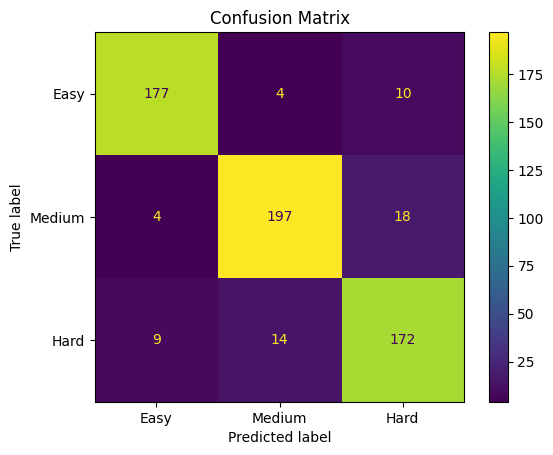

Model saved to question_classifier.pkl


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd
import numpy as np

# Preprocessing the CSV data
def preprocess_kaggle_data(file_path):
    df = pd.read_csv(file_path, encoding='latin1')

    # Rename columns for clarity
    df = df.rename(columns={
        'Question': 'Question',
        'DifficultyFromQuestioner': 'Difficulty'
    })
    
    # Map difficulty levels to numeric labels
    difficulty_map = {'easy': 0, 'medium': 1, 'hard': 2}
    df['Difficulty'] = df['Difficulty'].map(difficulty_map)
    
    # Drop rows with missing values
    df = df.dropna(subset=['Question', 'Difficulty'])
    
    # Filter out rows where 'Difficulty' mapping failed
    df = df[df['Difficulty'].notna()]
    return df

# Making Some visualizations
def visualize_data(data):
    # Countplot for difficulty levels
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Difficulty', data=data, palette='viridis')
    plt.title("Count of Questions by Difficulty")
    plt.xlabel("Difficulty Level")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1, 2], labels=["Easy", "Medium", "Hard"])
    plt.show()

    # Boxplot of text lengths by difficulty
    data['TextLength'] = data['Question'].apply(len)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Difficulty', y='TextLength', data=data, palette='coolwarm')
    plt.title("Boxplot of Question Text Lengths by Difficulty")
    plt.xlabel("Difficulty Level")
    plt.ylabel("Text Length")
    plt.xticks(ticks=[0, 1, 2], labels=["Easy", "Medium", "Hard"])
    plt.show()

# Train the model
def train_model(csv_path, model_path):
    data = preprocess_kaggle_data(csv_path)
    visualize_data(data)  # Visualize the dataset
    X_train, X_test, y_train, y_test = train_test_split(data['Question'], data['Difficulty'], test_size=0.2, random_state=42)
    
    # Pipeline for vectorization and classification
    model_pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ])
    
    # Grid search for hyperparameter tuning
    param_grid = {'classifier__C': [0.1, 1, 10]}
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Easy", "Medium", "Hard"])
    disp.plot(cmap='viridis')
    plt.title("Confusion Matrix")
    plt.show()

    # Save the model
    with open(model_path, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved to {model_path}")

# Main 
if __name__ == "__main__":
    csv_file = "combined_question_answer_pairs2.csv"
    model_file = "question_classifier.pkl"
    train_model(csv_file, model_file)
